In [164]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data_csv = "data/mouse_drug_data.csv"
clin_data_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data_csv)
clinical_df = pd.read_csv(clin_data_csv)
clinical_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [165]:
# Combine the data into a single dataset
df = mouse_df.merge(clinical_df,on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [166]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_gb = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
tumor_df = pd.pivot_table(tumor_gb, values='Tumor Volume (mm3)',index='Timepoint',columns='Drug')
tumor_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


#### Create both my tumor dataframes, one for the volume over time and the other for SE over time

In [167]:
tumor_se_gb = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()
tumor_se_df = pd.pivot_table(tumor_se_gb,values='Tumor Volume (mm3)',index='Timepoint',columns='Drug')
tumor_se_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


### Will only print out those that were shown in the class example
###### (Capomulin, Infubinol, Ketapril and Placebo)

In [168]:
# Create a Tumor df (dataset) to store the values for those four items we will generate a plot for
tumor_ds = tumor_df[['Capomulin','Infubinol','Ketapril','Placebo']]
tumor_se_ds = tumor_se_df[['Capomulin','Infubinol','Ketapril','Placebo']]
# Preview that Reformatting worked
tumor_ds.head()
tumor_se_ds.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


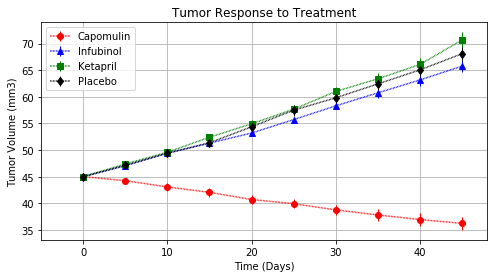

In [169]:
# Generate the Plot (with Error Bars)
myColors = ['red','blue','green','black']
myLabels = ['Capomulin','Infubinol','Ketapril','Placebo']
myMarkers = ['o','^','s','d']
ax = tumor_ds.plot(figsize=(8,4),colors = myColors,\
                   linestyle='--', dashes=(.5,.5), yerr = tumor_se_ds, legend = False,xlim=-2,label=myLabels,elinewidth=1)
ax.set_xlim([-5,48])

i = 0
while i < len(myMarkers):
    ax.lines[i].set_marker(myMarkers[i])
    i += 1
    
plt.xlabel('Time (Days)')    
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment',fontsize='large')
plt.legend(loc='best',prop={'size': 10})
plt.grid()

# tumor_plot.lines[]].set_marker('o')

# Save the Figure




In [170]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [171]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsite_gb = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index()
# Convert to DataFrame
metsite_df = pd.pivot_table(metsite_gb, values='Metastatic Sites',index='Timepoint',columns='Drug')
metsite_df.head()

# Preview DataFrame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [172]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_se_gb = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index()
metsite_se_df = pd.pivot_table(metsite_se_gb,values='Metastatic Sites',index='Timepoint',columns='Drug')

# Preview DataFrame
metsite_se_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [173]:
# Minor Data Munging to Re-Format the Data Frames
metsite_ds = metsite_df[['Capomulin','Infubinol','Ketapril','Placebo']]
metsite_se_ds = metsite_se_df[['Capomulin','Infubinol','Ketapril','Placebo']]
# Preview that Reformatting worked

metsite_se_gb = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index()
metsite_se_df = pd.pivot_table(metsite_se_gb,values='Metastatic Sites',index='Timepoint',columns='Drug')

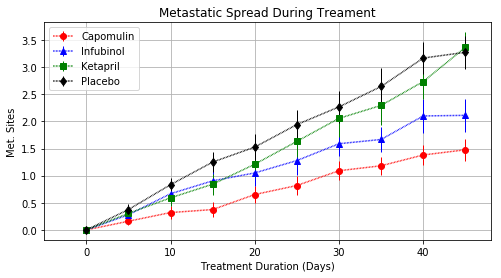

In [174]:
# Generate the Plot (with Error Bars)
myColors = ['red','blue','green','black']
myLabels = ['Capomulin','Infubinol','Ketapril','Placebo']
myMarkers = ['o','^','s','d']
ax = metsite_ds.plot(figsize=(8,4),colors = myColors,\
                   linestyle='--', dashes=(.5, .5), yerr = metsite_se_ds, legend = False,xlim=-2,label=myLabels,elinewidth=1)
ax.set_xlim([-5,48])

i = 0
while i < len(myMarkers):
    ax.lines[i].set_marker(myMarkers[i])
    i += 1
    
plt.xlabel('Treatment Duration (Days)')    
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treament',fontsize='large')
plt.legend(loc='best',prop={'size': 10})
plt.grid()
# Save the Figure

# Show the Figure


## Survival Rates

In [175]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_gb = df.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()

# Convert to DataFrame
mice_df = pd.pivot_table(mice_gb,values='Mouse ID',index='Timepoint',columns='Drug')
mice_df
# Preview DataFrame
# mice_se_gb = mice_gb.groupby(['Drug','Timepoint'])['Mouse ID'].sem().reset_index()
# mice_se_df = pd.pivot_table(mice_se_gb,values='Mouse ID',index='Timepoint',columns='Drug')
# mice_se_gb


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [176]:
# Minor Data Munging to Re-Format the Data Frames
mice_ds = mice_df[['Capomulin','Infubinol','Ketapril','Placebo']]
# mice_se_ds = mice_se_df[['Capomulin','Infubinol','Ketapril','Placebo']]
# Preview that Reformatting worked


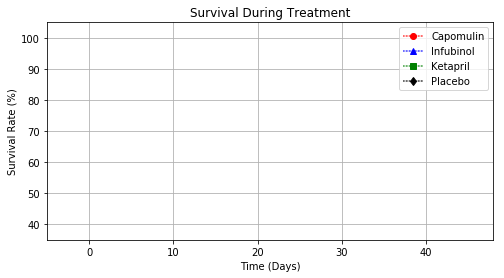

In [177]:
# Generate the Plot (with Error Bars)
myColors = ['red','blue','green','black']
myLabels = ['Capomulin','Infubinol','Ketapril','Placebo']
myMarkers = ['o','^','s','d']
ax = mice_ds.plot(figsize=(8,4),colors = myColors,\
                   linestyle='--', dashes=(.5, .5), legend = False,xlim=-2,label=myLabels)
ax.set_xlim([-5,48])
ax.set_ylim([35,105])

i = 0
while i < len(myMarkers):
    ax.lines[i].set_marker(myMarkers[i])
    i += 1
    
plt.xlabel('Time (Days)')    
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment',fontsize='large')
plt.legend(loc='best',prop={'size': 10})
plt.grid()
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

#### To come up with this section, I need to first come up with the initial and final volume to determine the percentage change


In [178]:
# Calculate the percentage change by taking the last value and first using iloc

tumor_perc_change =  ((tumor_df.iloc[-1]-tumor_df.iloc[0])/tumor_df.iloc[0]) * 100
tumor_perc_change



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [179]:
tumor_perc_change= tumor_perc_change.reset_index()
# tup = list(tumor_perc_change)
tumor_perc_change
tumor_perc_change.rename(columns={0:'PercentChange'},inplace=True)

# open_req_list

NameError: name 'p' is not defined

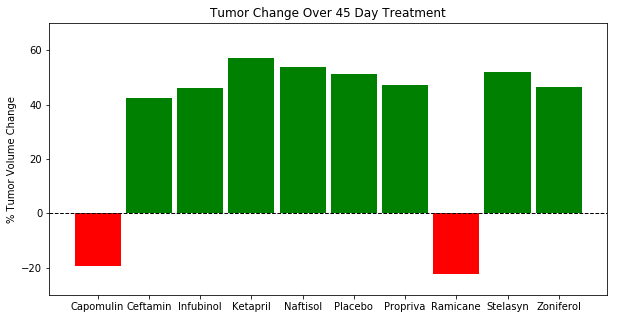

In [227]:
# Store all Relevant Percent Changes into a Tuple
perc_tup = tuple(list(tumor_perc_change['PercentChange']))
drug_tup = tuple(list(tumor_perc_change['Drug']))
# Splice the data between passing and failing drugs

i = 0
myColors=[]
while i < len(perc_tup):
    if perc_tup[i]>=0:
        myColors.append('g')
    else:
        myColors.append('r')
    i+=1
myColors

f, ax = plt.subplots(figsize=(10,5))
plt.bar(drug_tup,perc_tup, width=.9, bottom=None, align='center', data=None,color=myColors,label=perc_tup)
plt.axhline(y=0, color='black', linestyle='--',linewidth=1)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment',fontsize='large')

# Want to show bars over the grid
ax.set_axisbelow(True)

# Define the major ticks to be in intervals of 20
major_ticks = np.arange(-40, 80, 20)
ax.set_yticks(major_ticks)
ax.set_ylim([-30,70])

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()